# Datasets reduction

#### The two datasets are normalized and then reduced from the current 81 features to 3

The two datasets are `Contracts_feature_A2020.csv` and `Contracts_feature_B2020.csv`. They will be transformed into `Contracts_reduced_A2020.csv` and `Contracts_reduced_B2020.csv` respectively.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy.random as nr

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

First we reduce `Contracts_feature_A2020.csv`, then we repeat the same steps for `Contracts_feature_B2020.csv`

In [2]:
input_path2  = "<input_path2>\\Contracts_feature_A2020.csv"
conAfter2020 =pd.read_csv(input_path2)
conAfter2020 = conAfter2020.drop(labels=['index'], axis=1)
conAfter2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,0,3,188,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1075,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,501,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1133,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,501,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903752,1,1,1172,3,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1903753,1,2,1044,5,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1903754,0,3,560,3,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1903755,0,3,87,3,2,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


First we remove all the features that have the same values for all the tuples

In [3]:
ttt = []
for i in range(0,81):
    k = conAfter2020[conAfter2020.columns[i]].unique().tolist()
    if len(k)==1:
        ttt.append(i)

conAfter2020 = conAfter2020.drop(conAfter2020.columns[ttt], axis=1)
conAfter2020 

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,0,3,188,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1075,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,501,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1133,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,501,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903752,1,1,1172,3,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1903753,1,2,1044,5,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1903754,0,3,560,3,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1903755,0,3,87,3,2,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Some features are not binary and have different variance, so the feature values are normalized

In [4]:
def scaleFeaturesDF(df, verbose=False):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:
    
    scaled = preprocessing.StandardScaler(with_mean = False).fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    if verbose:
        print("New Variances:\n", scaled.var())
        print("New Describe:\n", scaled.describe())
    
    return scaled

conAfter2020 = scaleFeaturesDF(conAfter2020)
conAfter2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,0.000000,4.602601,0.487620,0.563121,2.987681,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,3.068401,2.788250,1.689362,0.000000,2.275039,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2.013324,1.534200,1.299454,1.689362,2.987681,2.275039,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2.013324,1.534200,2.938686,1.689362,0.000000,2.275039,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,2.013324,3.068401,1.299454,1.689362,2.987681,2.275039,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903752,2.013324,1.534200,3.039841,1.689362,1.493840,0.000000,0.0,0.0,0.000000,2.192624,...,0.0,0.0,0.0,0.0,0.0,0.0,4.212476,0.0,0.0,0.0
1903753,2.013324,3.068401,2.707844,2.815603,2.987681,2.275039,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,4.212476,0.0,0.0,0.0
1903754,0.000000,4.602601,1.452484,1.689362,2.987681,2.275039,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,4.212476,0.0,0.0,0.0
1903755,0.000000,4.602601,0.225654,1.689362,2.987681,2.275039,0.0,0.0,2.273735,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,4.212476,0.0,0.0,0.0


In order to keep the feature as low as possible to avoid redundancy in the new features, as well as for an easier representation, the dataset is reduced to 2 components

In [5]:
pca = PCA(copy=True, n_components=2, svd_solver='full', whiten=False)
T = pca.fit_transform(conAfter2020)
#T = pca.transform(conAfter2020)
reduced_contracts = pd.DataFrame(T)
reduced_contracts

,0,1
0,2.197577,5.119778
1,2.937710,0.604172
2,-1.217721,0.546854
3,2.952852,0.554283
4,-1.129646,0.703622
...,...,...
1903752,-2.099172,0.192675
1903753,-1.864039,-0.715630
1903754,-0.517797,0.325415
1903755,1.134546,-0.117313


Compute the correlation matrix

In [6]:
df_corr = pd.concat([reduced_contracts, conAfter2020], axis = 1)
df_corr = df_corr.corr()
df_corr

,0,1,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,1.000000e+00,-1.257624e-13,-0.272174,0.085479,-0.260570,0.097451,-0.616880,0.135116,0.030168,-0.065454,...,0.020994,-0.061233,-0.035985,-0.049913,-0.051290,0.219178,-0.017877,-0.037605,0.022947,0.035653
1,-1.257624e-13,1.000000e+00,0.105913,0.149951,-0.199098,-0.666007,0.093446,-0.594948,-0.032812,-0.232908,...,0.057804,0.024222,0.008197,-0.006901,0.038215,-0.199593,0.025891,0.019031,0.033683,0.002122
GENERE,-2.721739e-01,1.059128e-01,1.000000,-0.006702,0.049117,-0.154483,0.164375,-0.129635,0.007706,0.045712,...,-0.004368,-0.009342,0.000210,-0.011479,0.002422,-0.005466,0.004828,-0.001861,-0.012267,-0.021110
ETA,8.547863e-02,1.499507e-01,-0.006702,1.000000,-0.060054,-0.098479,0.002376,0.000937,0.009226,-0.011355,...,-0.007925,-0.002189,-0.012360,-0.005224,0.012150,0.020542,-0.001943,0.015499,-0.001081,-0.000760
SETTOREECONOMICODETTAGLIO,-2.605704e-01,-1.990981e-01,0.049117,-0.060054,1.000000,0.056290,0.004167,0.010483,0.020212,0.041916,...,-0.011285,0.021314,0.022818,0.030938,-0.014382,-0.075527,0.011572,-0.000162,-0.003481,0.021643
TITOLOSTUDIO,9.745087e-02,-6.660073e-01,-0.154483,-0.098479,0.056290,1.000000,-0.001686,0.415620,0.014061,0.087065,...,0.003081,-0.012446,0.012674,0.001842,-0.019798,0.024380,0.000338,-0.004695,0.003813,0.021342
MODALITALAVORO,-6.168800e-01,9.344573e-02,0.164375,0.002376,0.004167,-0.001686,1.000000,-0.047229,-0.009457,0.060408,...,-0.013838,0.026492,0.012739,0.013032,0.010377,-0.064474,0.000823,0.004091,-0.010729,-0.020006
CITTADINANZA,1.351162e-01,-5.949475e-01,-0.129635,0.000937,0.010483,0.415620,-0.047229,1.000000,0.016649,0.064369,...,0.019213,-0.011550,0.010932,0.003377,-0.022538,0.030752,0.002423,0.004250,0.024616,0.036068
0_0,3.016763e-02,-3.281209e-02,0.007706,0.009226,0.020212,0.014061,-0.009457,0.016649,1.000000,-0.019173,...,-0.004739,-0.003492,-0.006039,-0.004274,0.001893,0.020035,-0.008519,-0.006280,-0.002203,-0.009651
0_1,-6.545410e-02,-2.329078e-01,0.045712,-0.011355,0.041916,0.087065,0.060408,0.064369,-0.019173,1.000000,...,-0.019087,-0.013370,0.009002,-0.000138,0.005712,0.016145,0.010145,-0.009614,-0.017046,-0.004779


Plot a visualization of the correlation related to the 2 generated components. Since there is a large number of features, this is done via multiple plots 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[0, 1, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
[0, 1, 42, 43, 44, 45, 46, 47, 48, 49, 50]


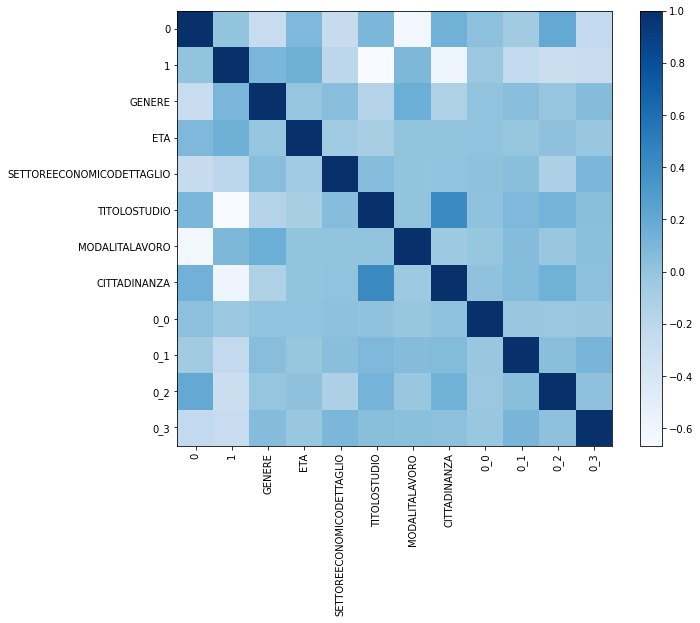

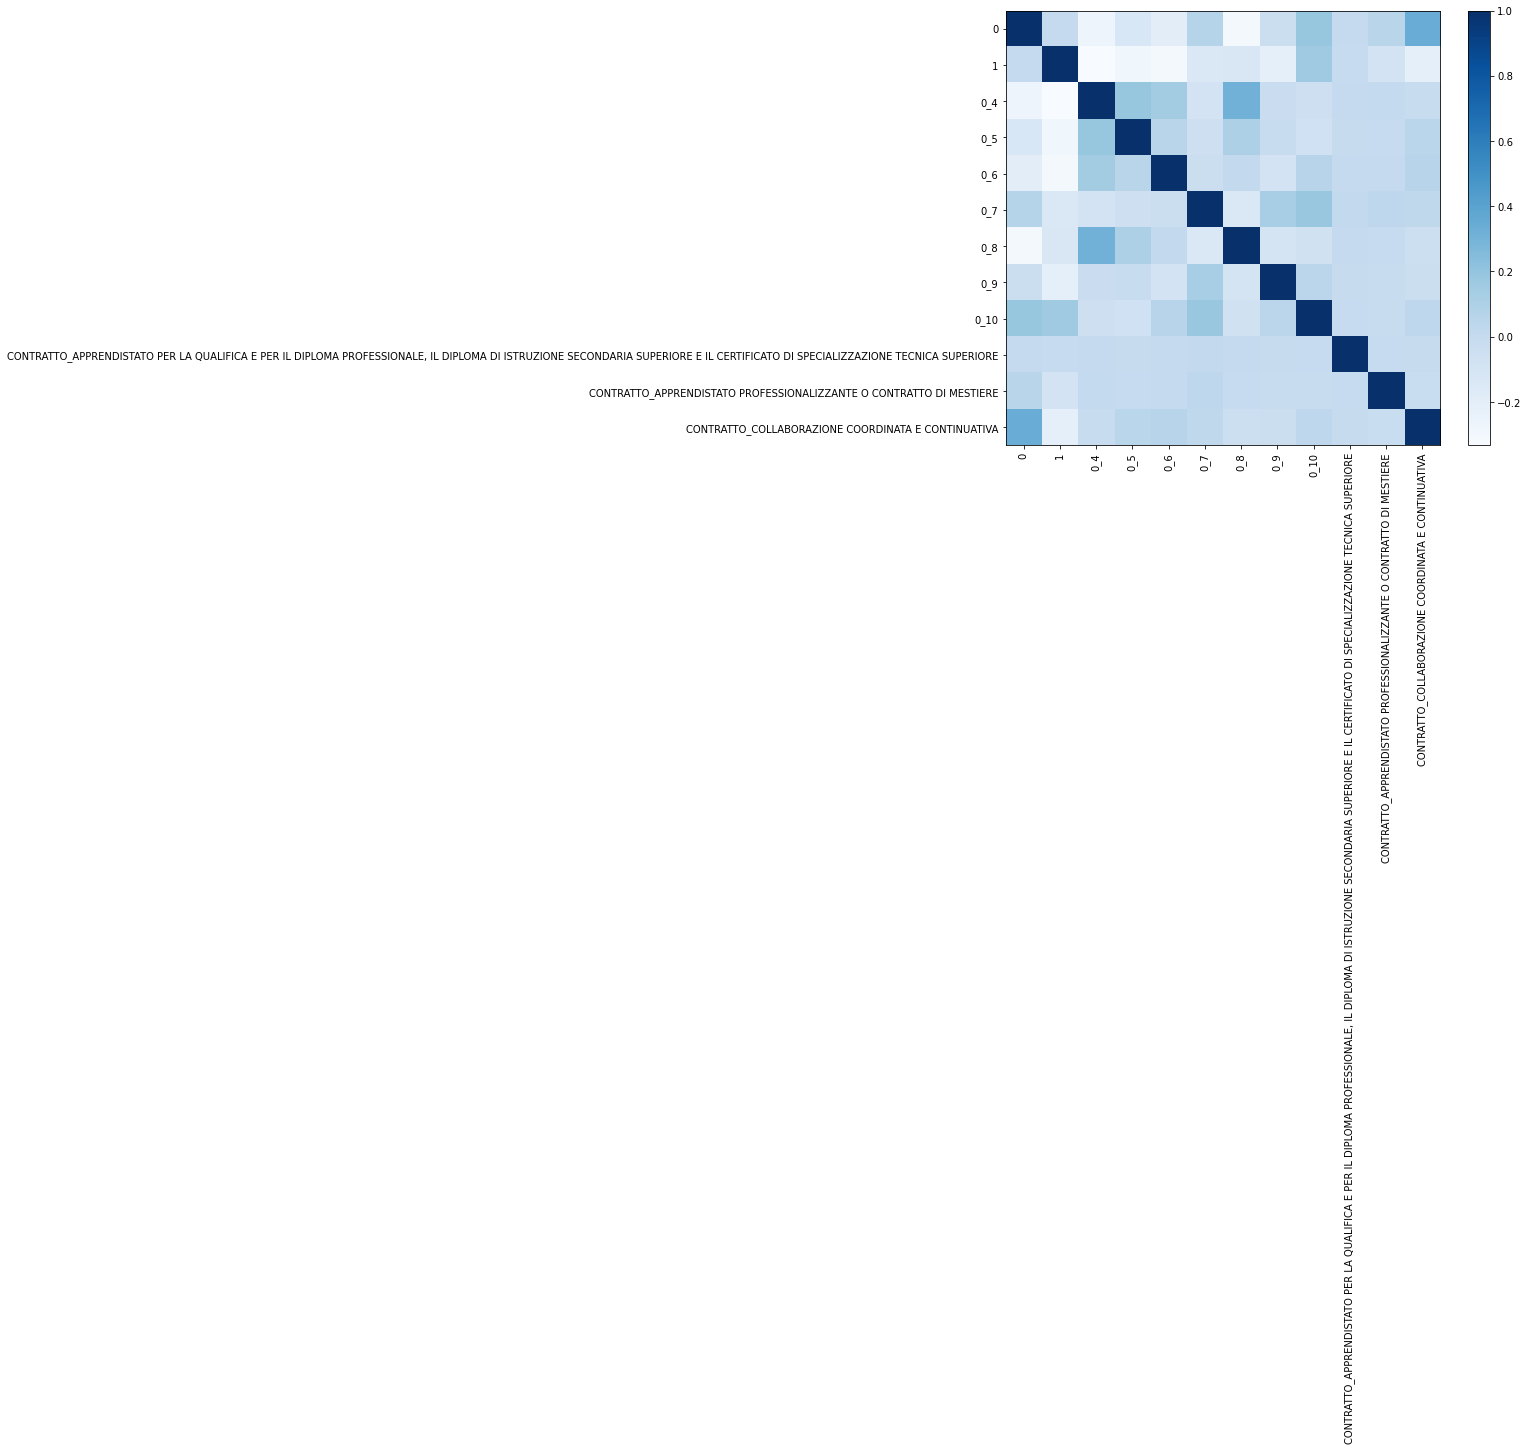

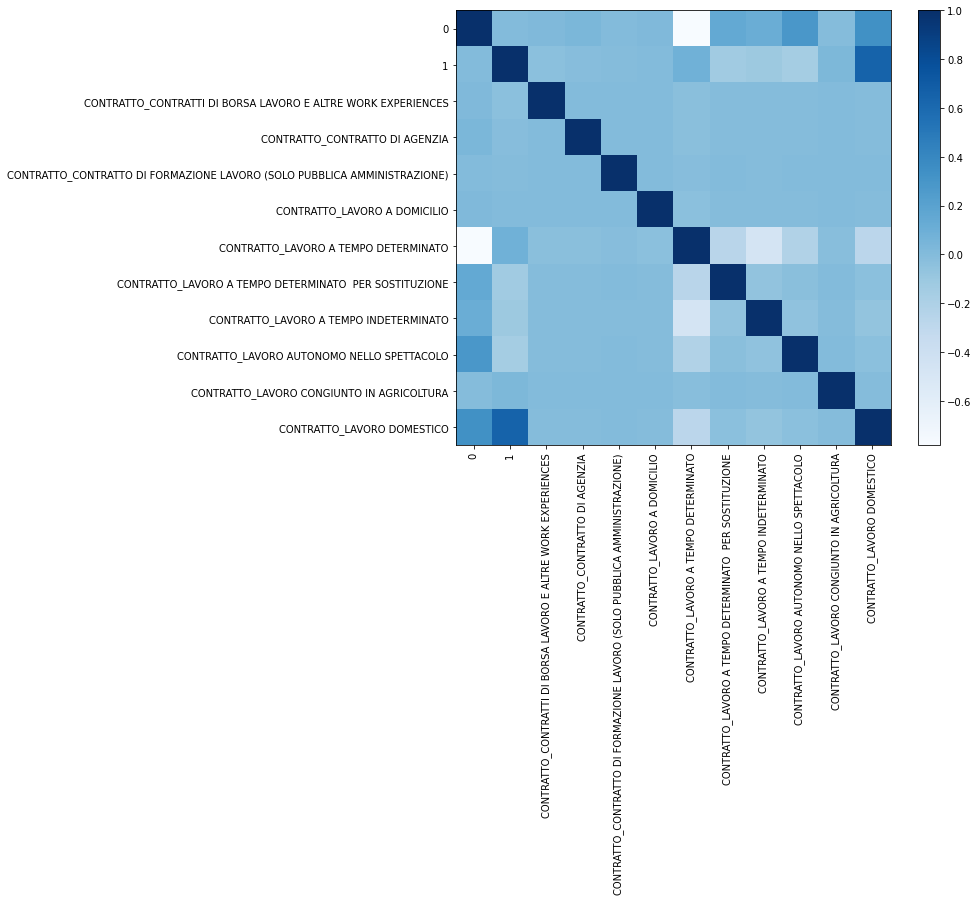

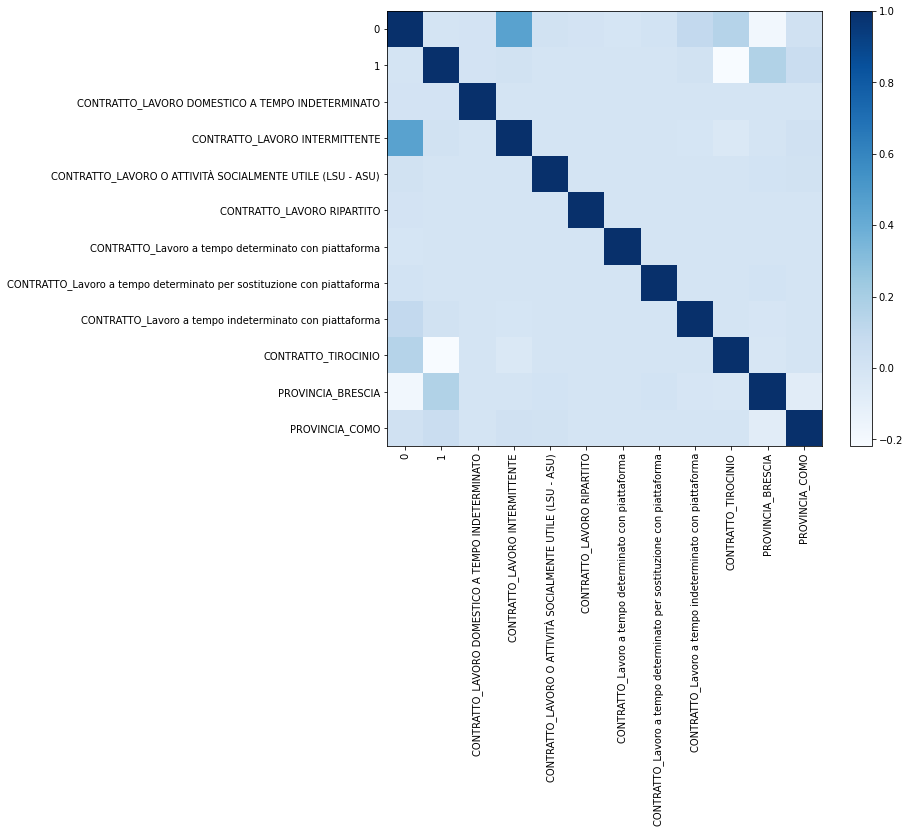

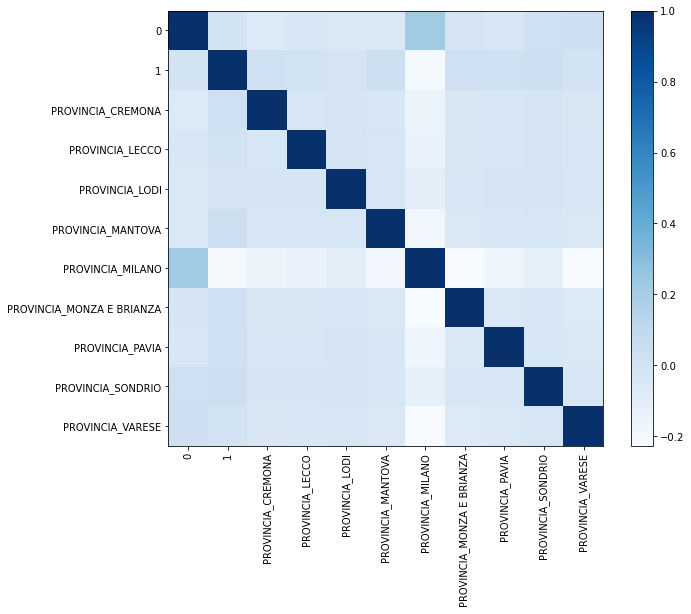

In [8]:
def printPlot(df,index_list):
    fig = plt.figure(figsize=(10,8))
    ooopp = df.iloc[index_list,index_list]
    plt.imshow(ooopp, cmap = plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    tick_marks = [i for i in range(len(ooopp.columns))]
    plt.xticks(tick_marks, ooopp.columns, rotation='vertical')
    plt.yticks(tick_marks, ooopp.columns)
    
rows = [0,1]
for i in range(0,5):
    a = 2+(10*i)
    b = a + 10
    if b > 51:
        b = 51
    for j in list(range(a,b)):
        rows.append(j)
    print(rows)
    printPlot(df_corr,rows)
    rows = [0,1]

The three components are mainly influenced by the following features (the value indicates the correlation value)
- 0
    - pos : /
    - neg : MODALITALAVORO -- -0.62 - CONTRATTO_LAVORO TEMPO DETERMINATO -- -0.78
- 1
    - pos : /
    - neg : TITOLOSTUDIO -- -0.67 - CITTADINANZA -- -0.59

Save the `Contracts_reduced_A2020.csv` dataset

In [19]:
#save
output_path2  = "<output_path2>\\Contracts_reduced_A2020.csv"
reduced_contracts=reduced_contracts.rename(columns={0:"Component 1", 1:"Component 2"})
reduced_contracts.to_csv(output_path2, index=False)
print("done")

done


Now we do the same things for the `Contracts_feature_B2020.csv` dataset

Load the dataset

In [21]:
input_path1 = "<input_path1>\\Contracts_feature_B2020.csv"
conBefore2020=pd.read_csv(input_path1)
conBefore2020 = conBefore2020.drop(labels=['index'], axis=1)
conBefore2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,1,2,831,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,480,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,871,6,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,66,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,188,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597479,0,2,87,6,2,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2597480,0,2,919,5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2597481,0,3,841,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2597482,0,3,919,3,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Remove features with the same value for all tuples

In [22]:
ttt = []
for i in range(0,81):
    k = conBefore2020[conBefore2020.columns[i]].unique().tolist()
    if len(k)==1:
        ttt.append(i)

conBefore2020 = conBefore2020.drop(conBefore2020.columns[ttt], axis=1)
conBefore2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,1,2,831,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,480,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,871,6,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,66,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,188,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597479,0,2,87,6,2,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2597480,0,2,919,5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2597481,0,3,841,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2597482,0,3,919,3,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Normalization

In [23]:
conBefore2020 = scaleFeaturesDF(conBefore2020)
conBefore2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,2.014358,3.115176,2.127191,1.725905,3.005225,2.314421,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,4.672764,1.228702,1.725905,1.502613,2.314421,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,3.115176,2.229583,3.451810,1.502613,2.314421,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2.014358,4.672764,0.168947,0.575302,1.502613,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,3.115176,0.481242,0.575302,3.005225,2.314421,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597479,0.000000,3.115176,0.222702,3.451810,3.005225,2.314421,0.0,0.0,2.278046,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.418824,0.0,0.0,0.0
2597480,0.000000,3.115176,2.352453,2.876508,1.502613,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.418824,0.0,0.0,0.0
2597481,0.000000,4.672764,2.152789,1.150603,1.502613,2.314421,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.418824,0.0,0.0,0.0
2597482,0.000000,4.672764,2.352453,1.725905,1.502613,2.314421,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.418824,0.0,0.0,0.0


Reduction and evaluation

In [24]:
pca = PCA(copy=True, n_components=2, svd_solver='full', whiten=False)
T = pca.fit_transform(conBefore2020)
reduced_contracts = pd.DataFrame(T)
reduced_contracts

,0,1
0,-1.125821,0.439590
1,-0.141546,0.783764
2,2.034162,0.224076
3,-1.142535,1.828060
4,0.881023,4.891900
...,...,...
2597479,-0.037192,-0.949140
2597480,0.002113,0.593836
2597481,-0.521089,-0.676802
2597482,0.243329,0.339531


In [25]:
df_corr = pd.concat([reduced_contracts, conBefore2020], axis = 1)
df_corr = df_corr.corr()
df_corr

,0,1,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,1.000000e+00,-5.237191e-15,-0.296825,0.001262,-0.093110,0.294861,-0.643704,0.300721,0.023083,-0.016567,...,-0.009156,-0.073470,-0.035448,-0.017351,-0.000074,0.207629,0.004409,-0.020998,-0.012472,0.016772
1,-5.237191e-15,1.000000e+00,-0.014364,0.100642,-0.033819,-0.531365,-0.172908,-0.482224,-0.018685,-0.257308,...,0.066327,0.035618,0.002243,0.002974,0.048565,-0.209021,0.037162,0.015545,0.049942,0.031639
GENERE,-2.968249e-01,-1.436429e-02,1.000000,0.007542,0.063534,-0.141513,0.171745,-0.115038,0.001220,0.064042,...,-0.002649,-0.013364,0.003513,-0.008358,-0.004383,-0.012215,0.002111,-0.008067,-0.010889,-0.013197
ETA,1.262293e-03,1.006420e-01,0.007542,1.000000,-0.051098,-0.087224,0.014715,0.017064,0.016574,-0.004254,...,-0.006219,-0.007799,-0.009298,-0.002574,0.017507,0.022410,-0.003335,0.006402,-0.000505,-0.003107
SETTOREECONOMICODETTAGLIO,-9.310970e-02,-3.381913e-02,0.063534,-0.051098,1.000000,0.006064,0.000328,-0.024313,0.023296,0.061113,...,0.006818,0.036349,0.021281,0.020286,-0.001144,-0.104857,0.021746,0.006789,-0.008524,0.012508
TITOLOSTUDIO,2.948610e-01,-5.313649e-01,-0.141513,-0.087224,0.006064,1.000000,0.008123,0.375503,0.018064,0.057703,...,-0.004504,-0.009206,0.019753,0.001185,-0.014859,0.007927,-0.001005,-0.001339,0.010459,0.027250
MODALITALAVORO,-6.437037e-01,-1.729079e-01,0.171745,0.014715,0.000328,0.008123,1.000000,-0.031836,-0.007836,0.060306,...,-0.000206,0.038599,0.020479,0.003026,0.005056,-0.069686,-0.002015,-0.005104,0.007694,-0.022534
CITTADINANZA,3.007209e-01,-4.822239e-01,-0.115038,0.017064,-0.024313,0.375503,-0.031836,1.000000,0.016073,0.053115,...,0.019913,-0.017975,0.015065,0.006800,-0.016034,0.030144,0.009913,0.004511,0.023419,0.036197
0_0,2.308331e-02,-1.868458e-02,0.001220,0.016574,0.023296,0.018064,-0.007836,0.016073,1.000000,-0.020689,...,-0.006135,-0.005969,-0.005399,-0.001566,-0.003083,0.017145,-0.006261,-0.006299,-0.002917,-0.005225
0_1,-1.656688e-02,-2.573083e-01,0.064042,-0.004254,0.061113,0.057703,0.060306,0.053115,-0.020689,1.000000,...,-0.013157,-0.011138,0.010257,-0.007093,-0.013780,-0.001216,0.000725,-0.010750,-0.007536,0.008302


[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 1, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[0, 1, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
[0, 1, 43, 44, 45, 46, 47]


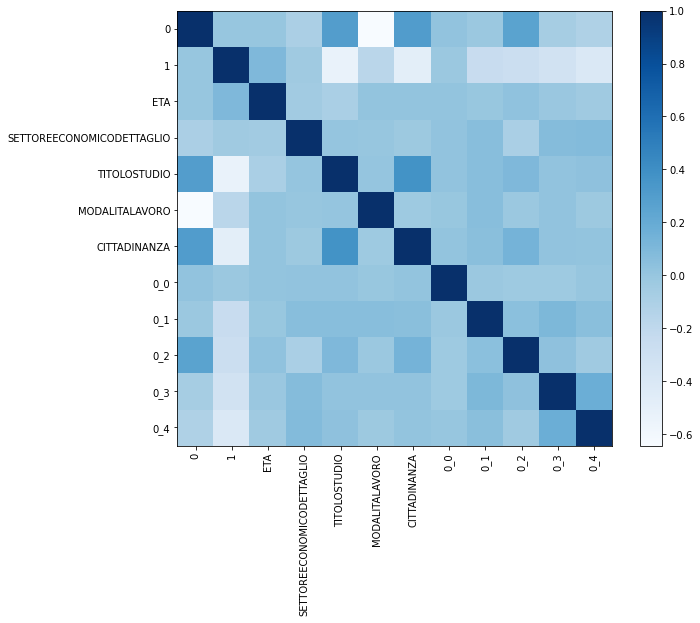

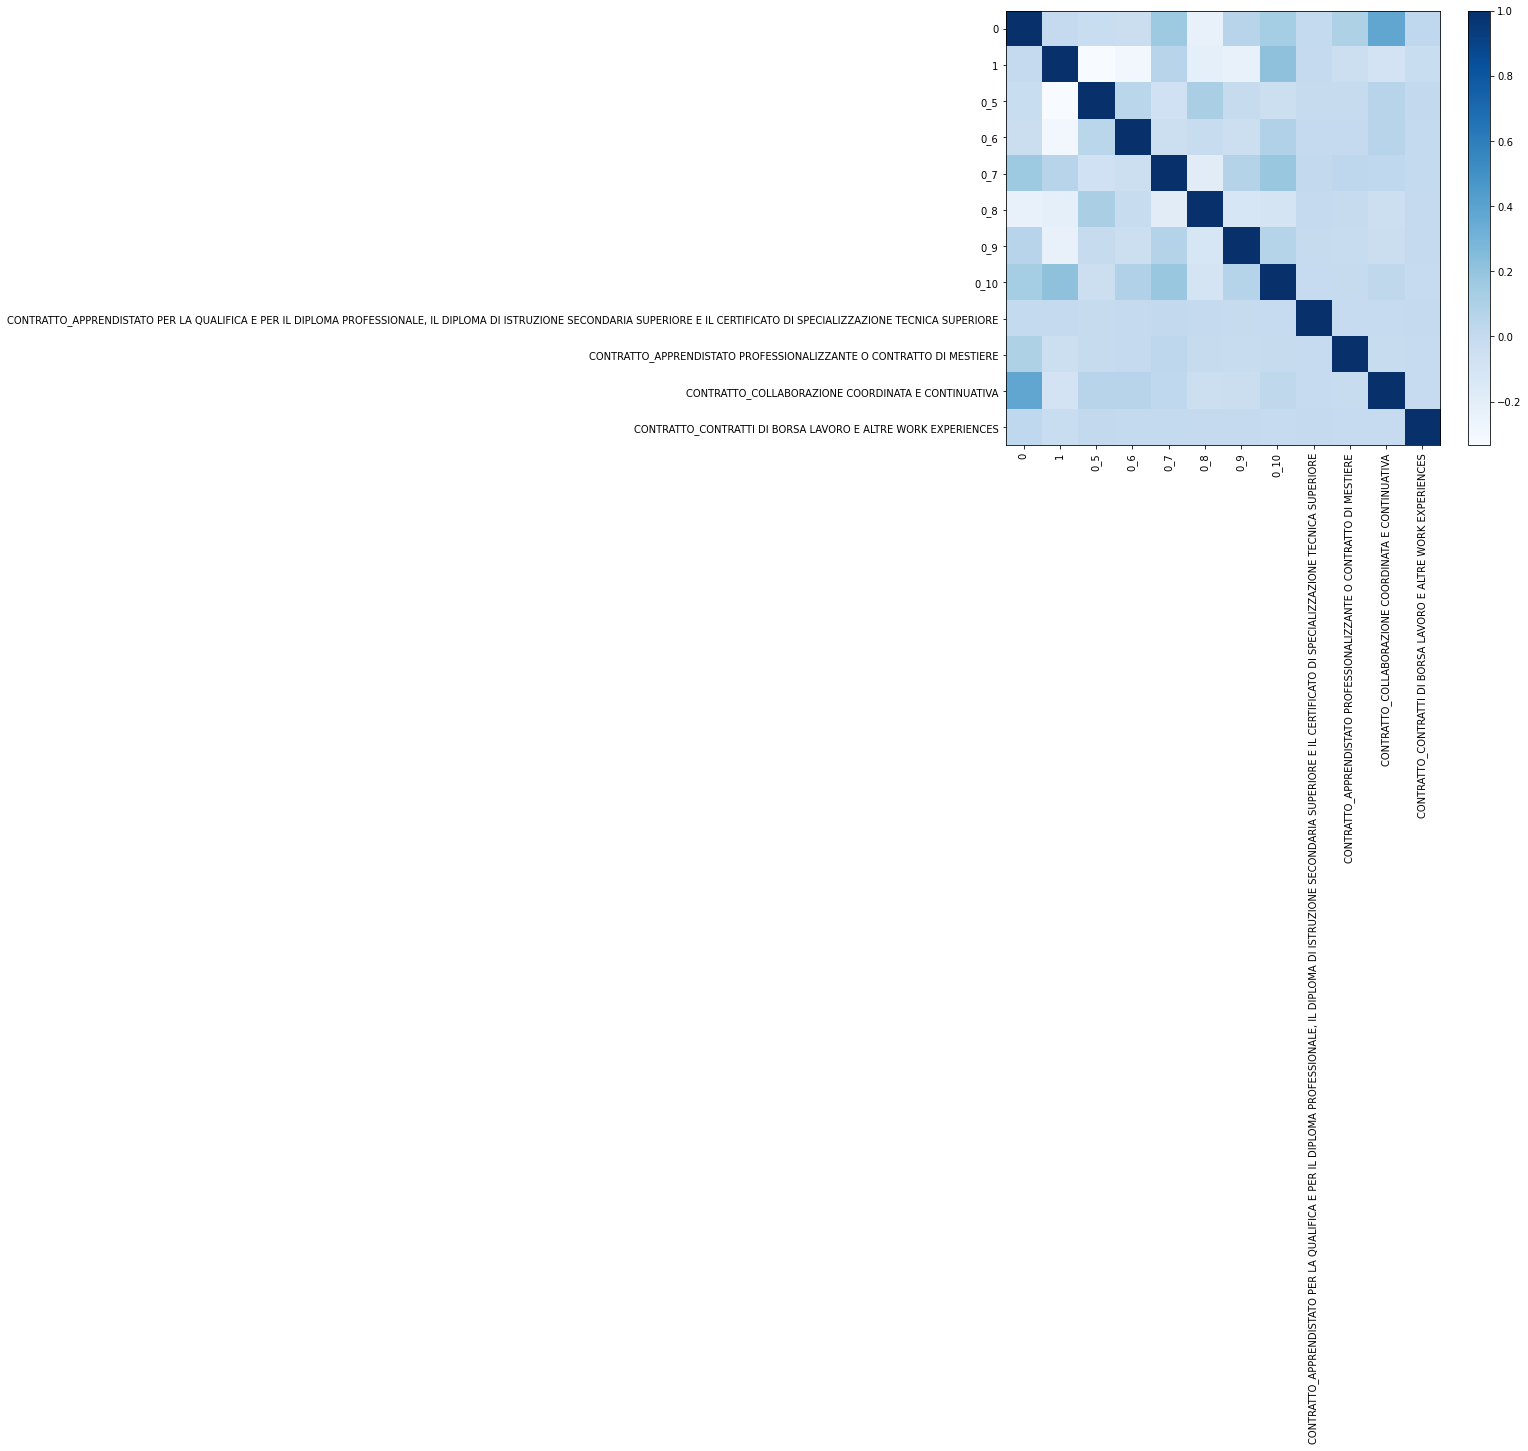

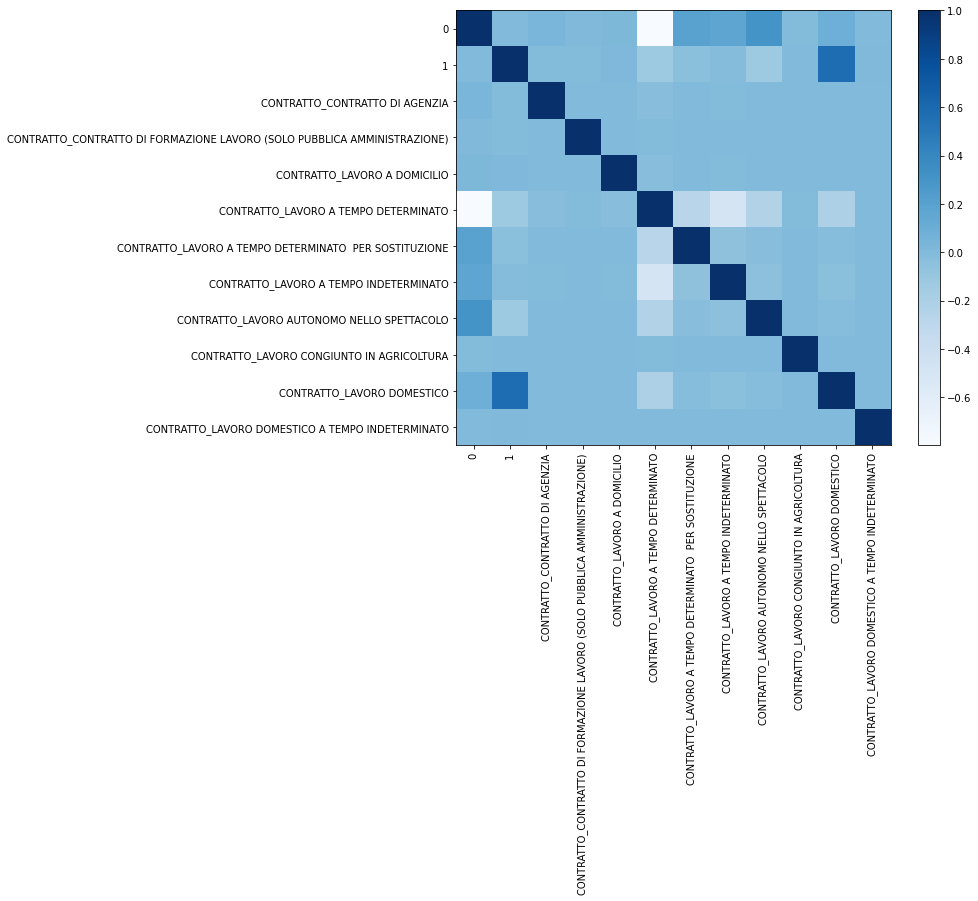

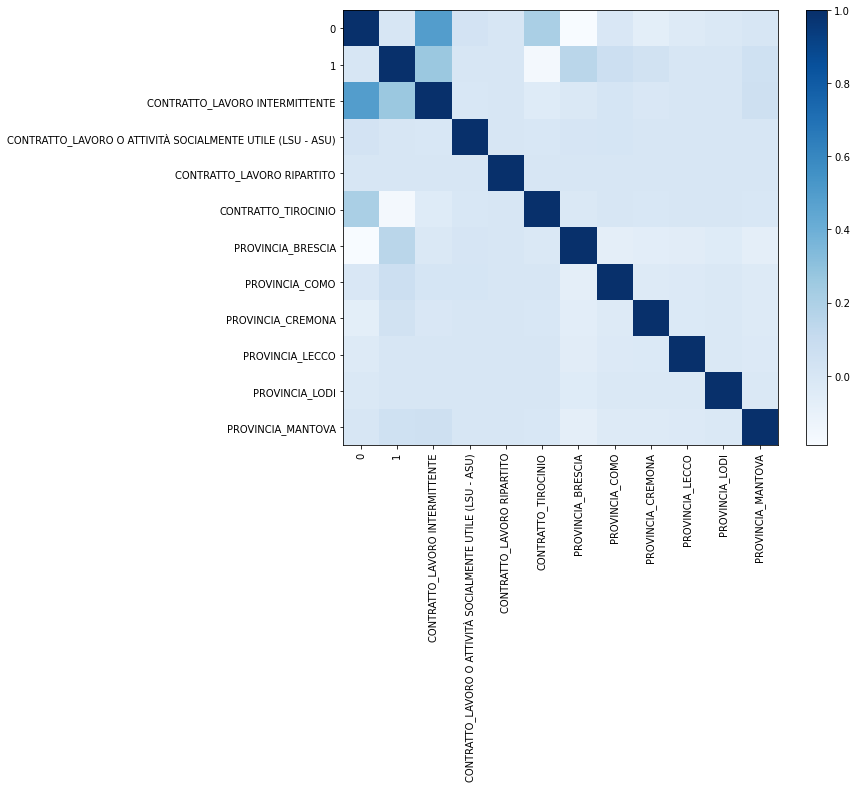

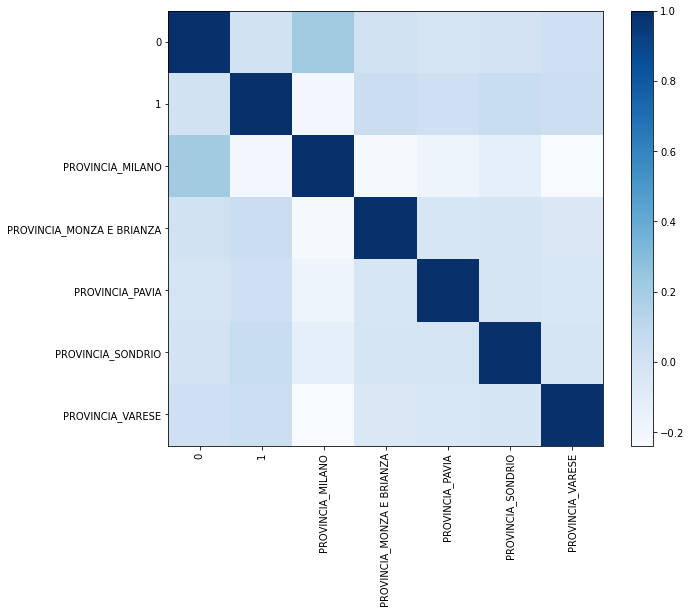

In [26]:
rows = [0,1]
for i in range(0,5):
    a = 3+(10*i)
    b = a + 10
    if b > 48:
        b = 48
    for j in list(range(a,b)):
        rows.append(j)
    print(rows)
    printPlot(df_corr,rows)
    rows = [0,1]

The three components are mainly influenced by the following features (the value indicates the correlation value)
- 0
    - pos : /
    - neg : MODALITALAVORO -- -0.64 - CONTRATTO_LAVORO A TEMPO DETERMINATO -- -0.8
- 1
    - pos : CONTRATTO_LAVORO DOMESTICO -- 0.57
    - neg : TITOLOSTUDIO -- -0.53

Save the `Contracts_reduced_B2020.csv` dataset

In [37]:
#save
output_path2  = "<output_path2>\\Contracts_reduced_B2020.csv"
reduced_contracts=reduced_contracts.rename(columns={0:"Component 1", 1:"Component 2"})
reduced_contracts.to_csv(output_path2, index=False)
print("done")

done
